In [ ]:
"""What I did is making hello world of NeuralNetworks From scracth With understanding each step """

🐼🐼🐼🐼🐼KUNG FU PANDA🐼🐼🐼🐼🐼

In [ ]:
import numpy as ysk#numpy ben oldum ben  https://www.youtube.com/watch?v=i3yYIH0-MTY   anladın mı?
import pandas as kungfupanda
from matplotlib import pyplot as pilot
#what ı did here is just fu

data = kungfupanda.read_csv('MnistwithneuralnetworksFromscracth/mnist_train.csv')

In [67]:
datam = ysk.array(data)
m, n = datam.shape
ysk.random.shuffle(datam) # a bit shaking the data
#spliting the data and make it in sets
data_dev = datam[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [54]:
Y_train


array([0, 9, 8, ..., 9, 9, 0])

In [70]:
def initParams():
    W1 = ysk.random.rand(10, 784) - 0.5
    b1 = ysk.random.rand(10, 1) - 0.5
    W2 = ysk.random.rand(10, 10) - 0.5
    b2 = ysk.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = ysk.exp(Z) / sum(ysk.exp(Z))
    return A

def forwardPropg(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLUDeriv(Z):
    return Z > 0

def oneHot(Y):
    one_hot_Y = ysk.zeros((Y.size, Y.max() + 1))
    one_hot_Y[ysk.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backwardPropg(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = oneHot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * ysk.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLUDeriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * ysk.sum(dZ1)
    return dW1, db1, dW2, db2

def updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [71]:
def getPredictions(A2):
    return ysk.argmax(A2, 0)

def getAccuracy(predictions, Y):
    print(predictions, Y)
    return ysk.sum(predictions == Y) / Y.size

def gradientDescent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = initParams()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forwardPropg(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backwardPropg(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = updateParams(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration--> ", i,"\n")
            predictions = getPredictions(A2)
            print("\n----------\n")
         
            print(getAccuracy(predictions, Y))
    return W1, b1, W2, b2

In [72]:
W1, b1, W2, b2 = gradientDescent(X_train, Y_train, 0.10, 1000)


Iteration-->  0
----------

Accuracy after iteration is:
[7 1 1 ... 1 7 7] [0 9 8 ... 9 9 0]
0.11623728813559323
Iteration-->  10
----------

Accuracy after iteration is:
[2 1 8 ... 9 9 3] [0 9 8 ... 9 9 0]
0.26616949152542374
Iteration-->  20
----------

Accuracy after iteration is:
[0 9 8 ... 9 9 0] [0 9 8 ... 9 9 0]
0.3389491525423729
Iteration-->  30
----------

Accuracy after iteration is:
[3 9 8 ... 9 9 0] [0 9 8 ... 9 9 0]
0.4193728813559322
Iteration-->  40
----------

Accuracy after iteration is:
[6 9 8 ... 9 9 0] [0 9 8 ... 9 9 0]
0.4928813559322034
Iteration-->  50
----------

Accuracy after iteration is:
[6 9 8 ... 9 9 0] [0 9 8 ... 9 9 0]
0.5439152542372881
Iteration-->  60
----------

Accuracy after iteration is:
[6 9 8 ... 9 9 0] [0 9 8 ... 9 9 0]
0.5822033898305085
Iteration-->  70
----------

Accuracy after iteration is:
[6 9 8 ... 9 9 0] [0 9 8 ... 9 9 0]
0.612135593220339
Iteration-->  80
----------

Accuracy after iteration is:
[6 9 8 ... 9 9 0] [0 9 8 ... 9 9 0]
0.

In [73]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forwardPropg(W1, b1, W2, b2, X)
    predictions = getPredictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    pilot.gray()
    pilot.imshow(current_image, interpolation='nearest')
    pilot.show()


Prediction:  [0]
Label:  0


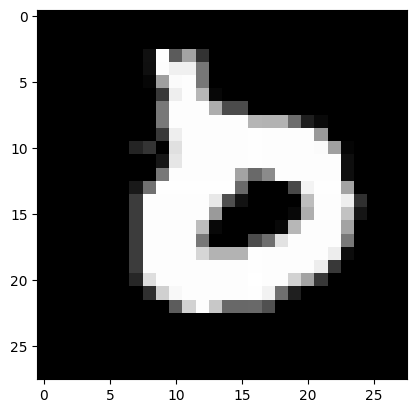

In [74]:
test_prediction(0, W1, b1, W2, b2)



In [75]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
getAccuracy(dev_predictions, Y_dev)

[1 2 4 4 4 2 6 5 1 7 3 7 2 1 4 1 4 6 4 6 1 0 6 8 0 5 6 8 0 0 4 3 0 7 1 1 1
 0 1 1 3 6 2 3 2 6 3 9 8 4 2 5 4 3 5 0 1 1 4 7 7 2 1 8 9 5 1 7 9 6 5 4 7 8
 1 9 2 1 7 9 2 0 5 3 8 0 5 7 4 6 7 9 6 5 7 9 6 4 4 1 7 6 8 3 9 1 4 4 1 7 5
 4 6 3 4 9 3 9 1 6 8 1 8 6 1 8 7 6 8 1 2 5 9 8 5 2 0 9 5 1 6 4 9 3 8 6 2 9
 8 7 9 1 5 9 4 6 3 8 5 9 7 0 6 3 3 5 0 0 9 6 3 1 2 3 3 0 9 8 8 4 3 3 5 0 4
 9 0 4 5 7 2 5 4 2 3 6 0 6 0 0 5 9 7 7 7 0 5 3 2 9 1 1 5 8 3 9 4 1 7 9 7 0
 2 1 0 0 6 7 0 2 1 6 3 3 9 2 5 2 3 4 5 5 5 1 6 6 0 8 3 3 6 7 1 8 7 8 3 5 7
 6 3 2 4 3 3 5 3 9 2 3 1 6 5 1 1 6 5 6 7 6 6 2 5 4 8 6 3 1 2 6 7 2 7 4 0 0
 4 6 4 3 3 5 9 6 2 1 9 6 9 2 9 1 6 7 6 4 2 5 7 3 7 3 1 4 3 7 8 7 1 5 6 9 1
 7 0 0 3 2 3 3 8 7 5 2 3 6 5 0 7 3 4 0 5 1 1 1 9 8 4 4 2 0 0 9 7 5 8 2 9 9
 0 9 2 5 5 7 2 2 3 3 5 8 2 9 3 0 9 8 8 4 2 5 9 0 2 6 1 0 0 1 2 4 5 0 5 7 5
 5 9 4 6 9 7 8 2 0 5 9 2 4 8 5 0 6 1 0 1 1 9 1 2 7 2 4 4 1 4 4 6 3 7 9 4 6
 3 3 3 5 1 9 9 9 8 1 6 1 0 3 1 1 8 6 6 6 3 7 2 9 6 0 8 5 6 3 9 3 7 7 3 6 5
 0 6 2 6 4 6 5 9 4 7 4 1 

0.892

Prediction:  [9]
Label:  9


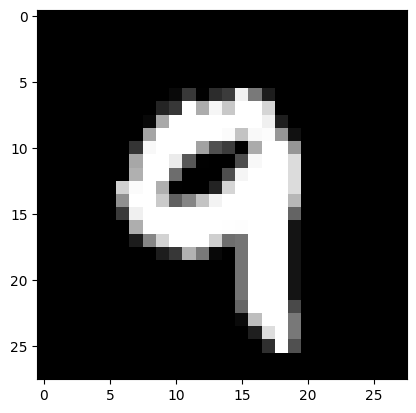

In [76]:

test_prediction(1, W1, b1, W2, b2)


Prediction:  [4]
Label:  4


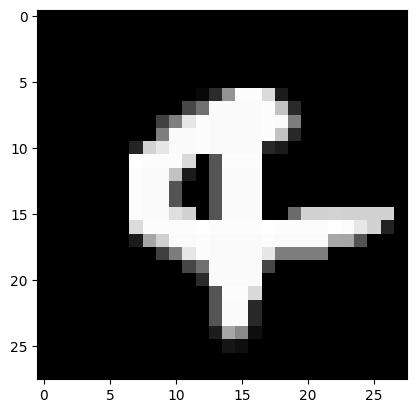

In [77]:
test_prediction(8, W1, b1, W2, b2)


Prediction:  [1]
Label:  1


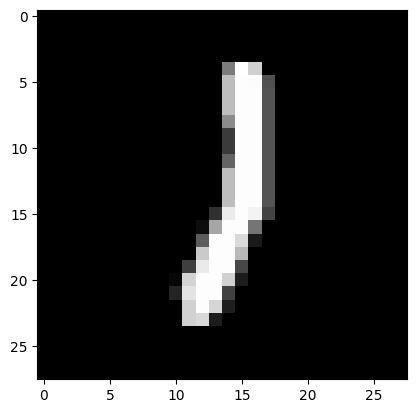

In [78]:
test_prediction(5, W1, b1, W2, b2)

Prediction:  [6]
Label:  6


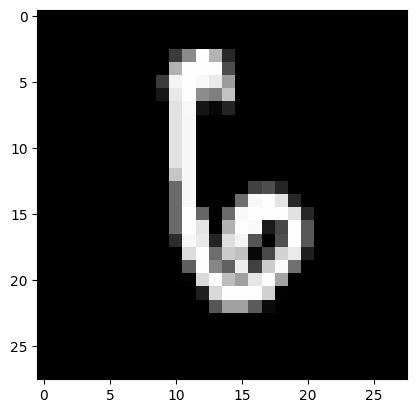

In [80]:
test_prediction(13, W1, b1, W2, b2)